Examen Segundo Parcial

In [1]:
%pip install pandas
%pip install seaborn
%pip install scikit-learn
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\braya\appdata\local\programs\python\python312\lib\site-packages (2.2.3)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 4.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.8 MB 4.1 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.8 MB 4.2 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.8 MB 4.1 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.8 MB 4.3 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.8 MB 4.2 MB/s eta 0:00:02
   -------------------------- ------------- 6.6/9.8 MB 4.2 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 4.2 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 4.2 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.8 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.2 MB/s eta 0:00:00
Note: you may need to rest


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

df_advertisement = pd.read_csv('advertising.csv')

In [3]:
df_advertisement.head()
df_advertisement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df_advertisement.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Imputación de valores nulos (Reemplazo con la media o mediana para variables numéricas)

In [5]:
df_advertisement.fillna(df_advertisement.mean(), inplace=True)

df_advertisement.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Análisis Exploratorio de Datos (EDA)

relación entre presupuestos y ventas

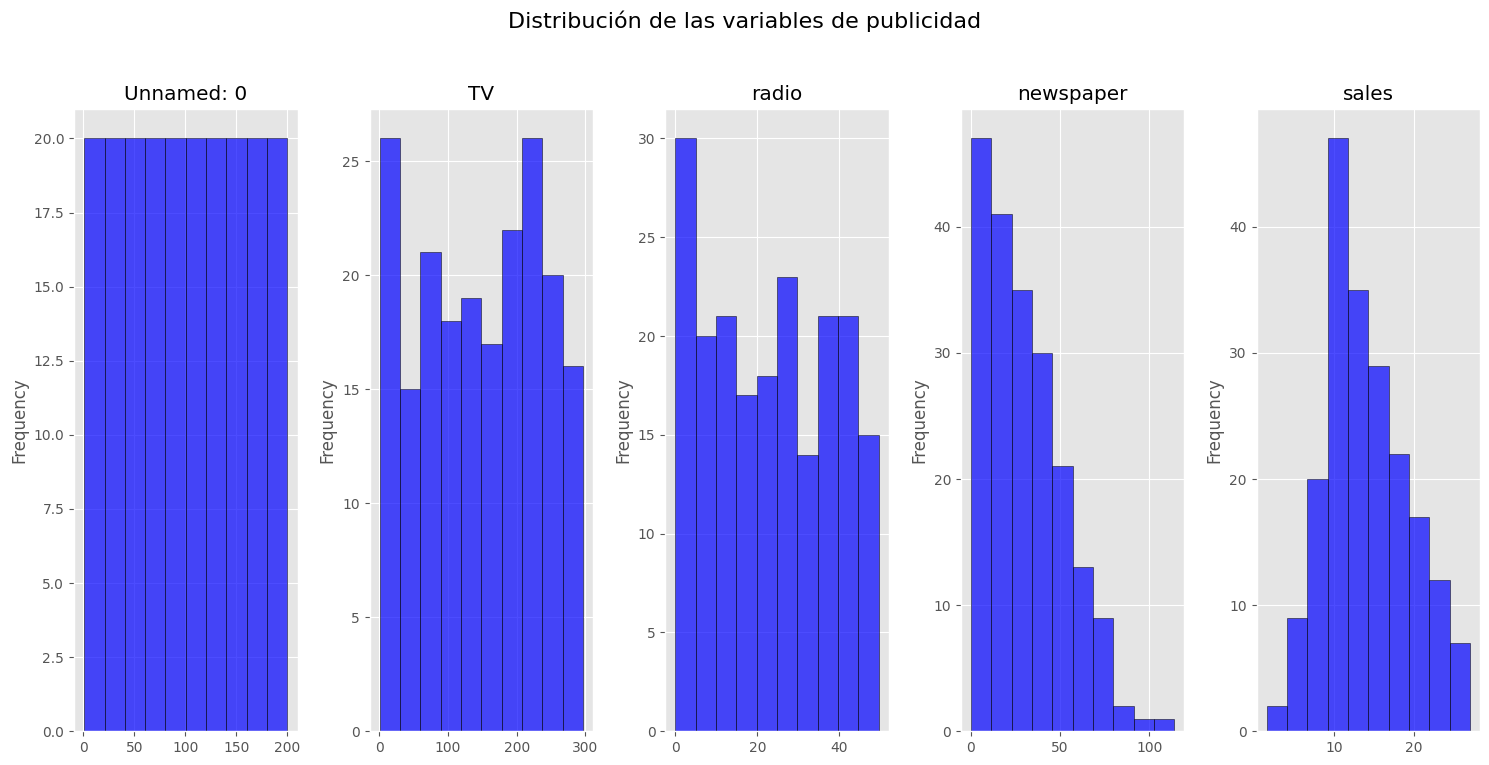

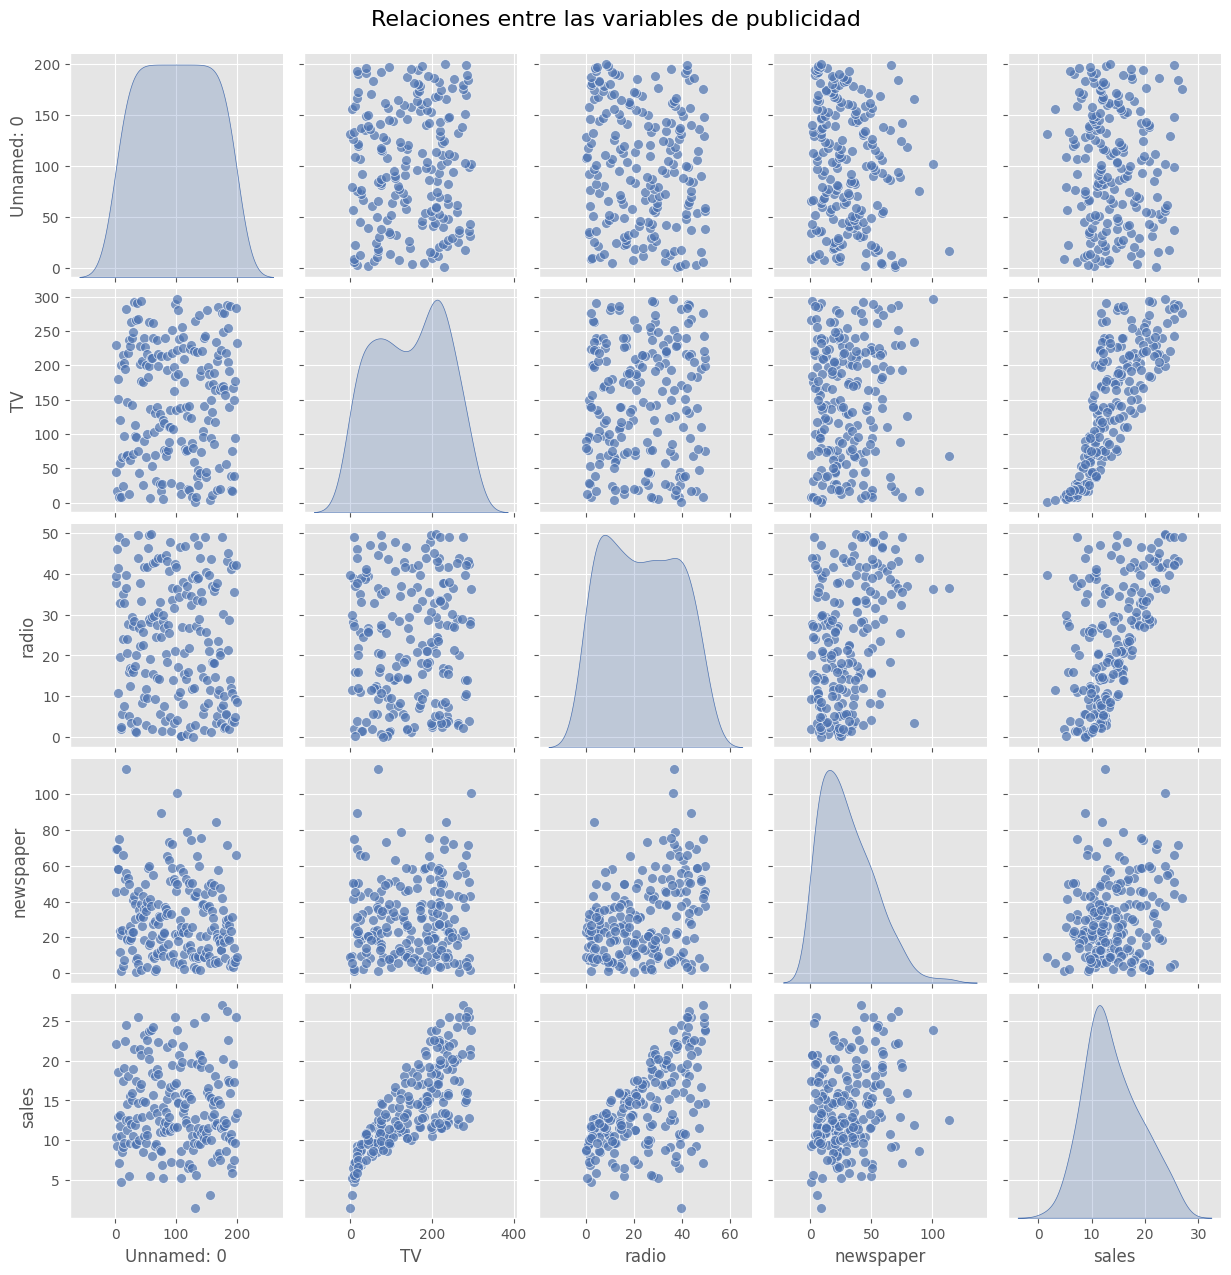

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuraciones
plt.style.use('ggplot')
sns.set_palette('deep')

# Histograma individual por columna
fig, axes = plt.subplots(nrows=1, ncols=len(df_advertisement.columns), figsize=(15, 8))
for i, column in enumerate(df_advertisement.columns):
    df_advertisement[column].plot.hist(bins=10, color='blue', edgecolor='black', alpha=0.7, ax=axes[i])
    axes[i].set_title(column)

plt.suptitle('Distribución de las variables de publicidad', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Gráficos de dispersión (pairplot)
sns.pairplot(df_advertisement, diag_kind="kde", plot_kws={"s": 50, "alpha": 0.7})
plt.suptitle('Relaciones entre las variables de publicidad', y=1.02, fontsize=16)
plt.show()


Correlación y mapa de calor

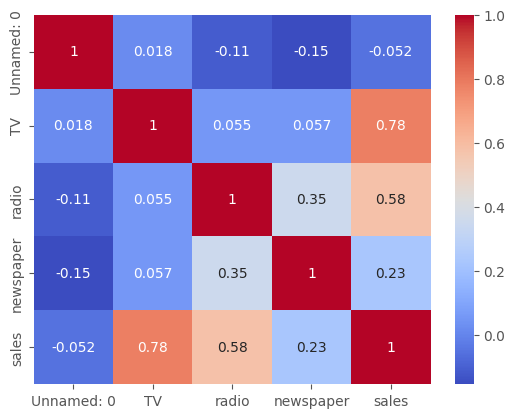

In [11]:
corr = df_advertisement.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Creación y Entrenamiento del Modelo de Predicción

In [12]:
from sklearn.model_selection import train_test_split

X = df_advertisement[['TV', 'radio', 'newspaper']]
y = df_advertisement['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Entrenamiento del modelo

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

Predicciones y evaluación del modelo

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Cálculo manual de la raíz cuadrada
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


RMSE: 1.7694072711611786
MAE: 1.3694443359949906
R²: 0.9046924770871361


Ingeniería de Características - Agregar la Variable Area

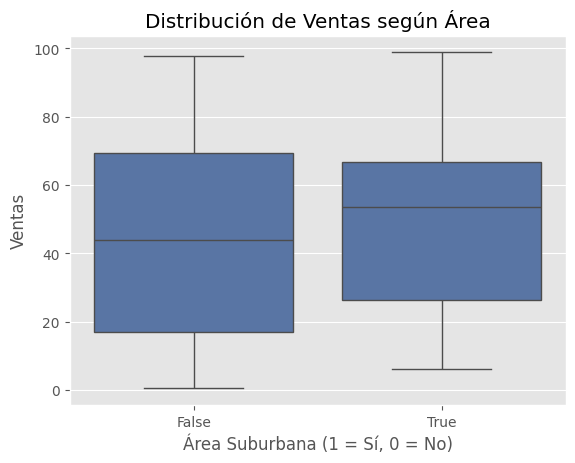

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
np.random.seed(0)  # Para resultados consistentes
df_advertisement = pd.DataFrame({
    'sales': np.random.rand(100) * 100  # Simulación de datos de ventas
})

# Crear la columna 'Area' con valores aleatorios entre 'rural', 'suburban' y 'urban'
df_advertisement['Area'] = np.random.choice(['rural', 'suburban', 'urban'], size=len(df_advertisement))

# Codificación de la columna 'Area' usando get_dummies
df_advertisement = pd.get_dummies(df_advertisement, columns=['Area'], drop_first=True)

# Crear una gráfica de ventas en función del área suburbana
sns.boxplot(data=df_advertisement, x='Area_suburban', y='sales')
plt.xlabel('Área Suburbana (1 = Sí, 0 = No)')
plt.ylabel('Ventas')
plt.title('Distribución de Ventas según Área')
plt.show()


Preguntas

¿Existe una relación entre las ventas y el gasto en los distintos canales publicitarios?

¿Cuál es el canal que tiene más relación con las ventas?

¿Cuál es el modelo que describe ambos problemas?

¿Cuál es el mejor canal para aumentar las ventas?

¿Cuál es el peor canal para aumentar las ventas?

In [27]:
import pandas as pd
import statsmodels.api as sm

data = pd.DataFrame({
    'TV': [230, 44, 17, 151, 180],
    'radio': [37, 39, 45, 41, 10],
    'newspaper': [69, 76, 78, 47, 57],
    'Sales': [22, 10, 9, 18, 21]
})

# Analyzing relationships and dependencies
# 1. Correlation analysis for sales against each channel
correlations = data.corr()['Sales']

# 2. Building a regression model to find the best predictor
# Including all channels to find significant predictors
X = data[['TV', 'radio', 'newspaper']]
X = sm.add_constant(X)  # Adding a constant term for intercept in the regression
y = data['Sales']

# Fitting a regression model
model = sm.OLS(y, X).fit()
model_summary = model.summary()

correlations, model_summary

C:\Users\braya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


(TV           0.989139
 radio       -0.570380
 newspaper   -0.648144
 Sales        1.000000
 Name: Sales, dtype: float64,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Sales   R-squared:                       0.997
 Model:                            OLS   Adj. R-squared:                  0.986
 Method:                 Least Squares   F-statistic:                     98.05
 Date:                Tue, 12 Nov 2024   Prob (F-statistic):             0.0741
 Time:                        18:19:47   Log-Likelihood:                -1.3789
 No. Observations:                   5   AIC:                             10.76
 Df Residuals:                       1   BIC:                             9.196
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                  coef    st

Respuestas

Relación entre ventas y canales publicitarios:
El análisis de correlación revela que la inversión en TV tiene una fuerte correlación positiva con las ventas, lo que indica una relación significativa. 
En cambio, tanto Radio como Social Media muestran correlaciones moderadas negativas con las ventas, lo cual sugiere que podrían no ser predictores efectivos para un aumento en las ventas.

Canal más relacionado con las ventas:
De acuerdo con el coeficiente de correlación, la inversión en TV es el canal que muestra una relación más fuerte con las ventas.

Modelo que aborda ambos aspectos:
Se utilizó un modelo de regresión lineal múltiple para predecir las ventas en función de los tres canales publicitarios. Los resultados indican que la inversión en TV es el único factor significativo en este conjunto de datos, mientras que Radio y periódico no parecen aportar predicciones confiables en esta situación.

Mejor y peor canal para incrementar ventas:
Según los resultados del modelo y los coeficientes, el canal más efectivo para aumentar las ventas es la TV, dada su alta correlación y coeficiente positivo. En contraste, Radio y el periódico tienen coeficientes negativos, lo que sugiere que podrían no ser efectivos para aumentar las ventas en este contexto. Estos resultados indican que enfocar la inversión en publicidad en TV sería la estrategia más efectiva para incrementar las ventas.